In [113]:
import settings
import numpy as np
import features as fts
import matplotlib.pyplot as plt
import seaborn; seaborn.set(palette='Set2')
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
frame = np.load(f'{settings.DATA_PATH}/audio/actors.frame.npy', allow_pickle=True)

In [14]:
energies = {}
for sample in frame:
    emo = sample['emotion']
    if emo not in energies:
        energies[emo] = []
    sig = sample['signal']
    e = fts.energy(sig).mean()
    energies[emo].append(e)

In [27]:
from scipy.signal import savgol_filter

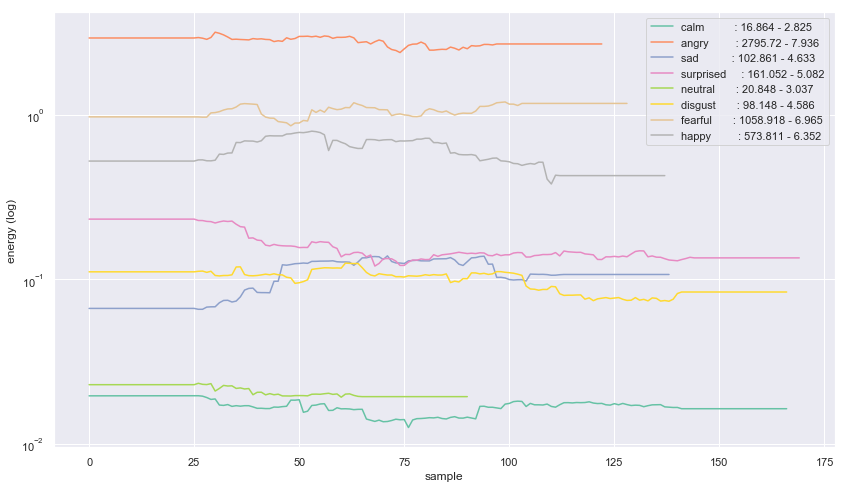

In [116]:
for emo, en in energies.items():
    en = np.array(en)
    enm = round(en.mean(), 3)
    en = en[en >  enm * 0.1]
    sav = savgol_filter(en, 51, 0)
    sav_mean = round(np.array(sav).mean() * 1000, 3)
    sav_mean_log = round(np.log(sav_mean), 3)
    label = f'{emo:<14}: {sav_mean} - {sav_mean_log}'
    plt.plot(sav, label=label)

plt.yscale('log')
plt.xlabel('sample')
plt.ylabel('energy (log)')
_ = plt.legend()
plt.show()